In [2]:
import json
from collections import Counter
import pandas as pd

In [3]:
# Read File

file_name = "../../Data/MaSaC/MaSaC_train_efr.json"
with open(file_name, 'r') as file:
        dataset = json.load(file)

In [4]:
# Number of episodes in dataset

N = len(dataset)
print(N)

4893


In [5]:
# Sample Episode

dataset[0]

{'episode': 'lease1.wmv',
 'speakers': ['monisha', 'sahil', 'monisha', 'sahil', 'monisha'],
 'utterances': ['theek se wajan karana',
  'monisha',
  'abhi ayi. yeh, ye bhi rakho.',
  'monisha, iss churidaar me nara nhi hai.',
  'to kisee aur churidaar ka nara nikalke dalo na isme sahil.'],
 'triggers': ['0', '0', '0', '1', '0'],
 'emotions': ['neutral', 'neutral', 'anger', 'neutral', 'neutral']}

In [6]:
# Emotion Flip Analysis

# Read File

file_name = "../../Data/MaSaC/MaSaC_train_efr.json"
with open(file_name, 'r') as file:
        dataset = json.load(file)

# Reading the data

episodes_list = []
speakers_list = []
utterances_list = []
triggers_list = []
emotions_list = []

for i in range(len(dataset)):
        episodes_list.append(dataset[i]['episode'])
        speakers_list.append(dataset[i]['speakers'])
        utterances_list.append(dataset[i]['utterances'])
        triggers_list.append(dataset[i]['triggers'])
        emotions_list.append(dataset[i]['emotions'])  

N = len(dataset)   

data = [[],[],[],[],[]]
# prev_first_sen = utterances_list[0][0]
d_id = -1
for i in range(N):
    if i==N-1 or utterances_list[i][0]!=utterances_list[i+1][0]:
        d_id+=1
        # if i!=N-1:
        #         prev_first_sen = utterances_list[i+1][0]
        data_temp = [[],[],[],[],[]]
        
        for j in range(len(utterances_list[i])):
            data_temp[0].append(d_id)
            data_temp[1].append(speakers_list[i][j])
            data_temp[2].append(emotions_list[i][j])
            data_temp[3].append(utterances_list[i][j])
            data_temp[4].append(triggers_list[i][j])
        
        data[0].append(data_temp[0])
        data[1].append(data_temp[1])
        data[2].append(data_temp[2])
        data[3].append(data_temp[3])
        data[4].append(data_temp[4])
                       
speakers_list_uq = data[1]
emotions_list_uq = data[2]
utterances_list_uq = data[3]
triggers_list_uq = data[4]

N_uq = len(utterances_list_uq)

In [7]:
print(N)
print(N_uq)

4893
452


In [8]:
# Speaker Data Analysis

# Data Processing
speakers_data_uq = [None] * N_uq

for i in range(N_uq):
    c_uq = Counter()
    c_uq.update(speakers_list_uq[i])
    speakers_data_uq[i] = c_uq.items()

# Finding Average
instance_count_uq = 0
total_count_uq = 0
for i in range(N_uq):
    for person, utt_count in speakers_data_uq[i]:
        total_count_uq += utt_count
        instance_count_uq += 1

print("Total Utterances ", total_count_uq)
avg_utt_per_person_uq = total_count_uq / instance_count_uq
print("Average Number of Utterances one person performs in an episode is {:.2f}".format( avg_utt_per_person_uq))

# Speaker Count Data Analysis
person_count_uq = 0
for i in range(N_uq):
    for person, utt_count in speakers_data_uq[i]:
        person_count_uq += 1
        
print("Average Number of Speakers in an episode is {:.2f}".format(person_count_uq / N_uq))

Total Utterances  11260
Average Number of Utterances one person performs in an episode is 6.96
Average Number of Speakers in an episode is 3.58


In [9]:
total_count_uq

11260

In [10]:
# Utterance Count Data Analysis
utterances_count_uq = [None] * N_uq

for i in range(N_uq):
    utterances_count_uq[i] = len(utterances_list_uq[i])
   
total_count_uq = 0
for i in range(N_uq):
    total_count_uq += utterances_count_uq[i]
    
print("Average Number of Utterances in an episode is {:.2f}".format(total_count_uq / N_uq))

Average Number of Utterances in an episode is 24.91


In [11]:
# Trigger Count Data Analysis
triggers_count = [None] * N

for i in range(N):
    for j in range(len(triggers_list[i])):
        try:
            triggers_list[i][j] = int(float(triggers_list[i][j]))
        except:
            print(f"Data Error: In episode {i} the utterance {j} has trigger label {triggers_list[i][j]}")  
            triggers_list[i][j] = 0
            
    triggers_count[i] = sum(triggers_list[i])
   
total_count = 0
for i in range(N):
    total_count += triggers_count[i]
    
print("Average Number of triggers in an episode is {:.2f}".format(total_count / N))

Data Error: In episode 775 the utterance 26 has trigger label Curiosity
Data Error: In episode 1449 the utterance 18 has trigger label Annoyance
Average Number of triggers in an episode is 1.34


In [12]:
# Emotion Count Data Analysis
emotions_data_uq = [None] * N_uq

for i in range(N_uq):
    c_uq = Counter()
    c_uq.update(emotions_list_uq[i])
    emotions_data_uq[i] = c_uq.items()
    
c_uq = Counter()
for i in range(N_uq):
    c_uq.update(emotions_list_uq[i])

for count, label in sorted( ((v,k) for k,v in c_uq.items()), reverse=True):
    print(f"Utterances with label {label} is {count}")

Utterances with label neutral is 5107
Utterances with label joy is 2138
Utterances with label anger is 1052
Utterances with label sadness is 845
Utterances with label fear is 707
Utterances with label contempt is 693
Utterances with label surprise is 556
Utterances with label disgust is 162


In [13]:
# Trigger Detailed Analysis

labels = ["neutral", "anger", "surprise", "fear", "joy", "sadness", "disgust", "contempt"]

count_dict = {}
for l in labels:
    count_dict[l] = 0

dist_counter = Counter()

for i in range(N):
    for j in range(len(triggers_list[i])):
        if triggers_list[i][j]==1:
            to_emotion = emotions_list[i][j]
            count_dict[to_emotion] += 1
            dist_counter.update([len(triggers_list[i])-1 - j])
            
for count, label in sorted( ((v,k) for k,v in count_dict.items()), reverse=True):
    print(f"Number of Triggers which had emotion {label} are {count}")

Number of Triggers which had emotion neutral are 2960
Number of Triggers which had emotion joy are 1216
Number of Triggers which had emotion anger are 575
Number of Triggers which had emotion sadness are 566
Number of Triggers which had emotion fear are 408
Number of Triggers which had emotion contempt are 369
Number of Triggers which had emotion surprise are 334
Number of Triggers which had emotion disgust are 114


In [14]:
count_dict

{'neutral': 2960,
 'anger': 575,
 'surprise': 334,
 'fear': 408,
 'joy': 1216,
 'sadness': 566,
 'disgust': 114,
 'contempt': 369}

In [15]:
sum_values = sum(count_dict.values())
pdf = dict()
for key in count_dict.keys():
    pdf[key] = 1/(count_dict[key] / sum_values)


ordered_keys = ['disgust', 'joy', 'surprise', 'anger', 'fear', 'neutral', 'sadness', 'contempt']
print('[',end='')
for key in ordered_keys:
    print(pdf[key], end=',')
print(']')

[57.3859649122807,5.379934210526316,19.58682634730539,11.377391304347826,16.034313725490197,2.2101351351351353,11.558303886925795,17.7289972899729,]


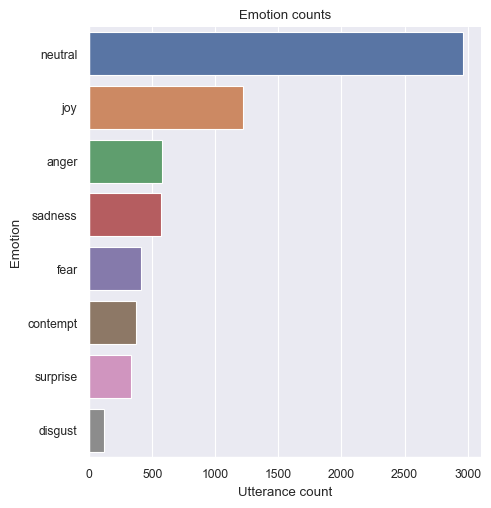

In [16]:
utt_label = pd.DataFrame(columns=['emotion', 'count'], data=count_dict.items())
utt_label = utt_label.rename(columns={'emotion': 'Emotion', 'count': 'Utterance count'})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('paper')
sns.catplot(data=utt_label.sort_values(by='Utterance count', ascending=False), kind='bar', y='Emotion', x='Utterance count')\
    .set(title='Emotion counts')
plt.savefig('task2_emotion_counts.svg', bbox_inches="tight")
plt.savefig('task2_emotion_counts.pdf', bbox_inches="tight")

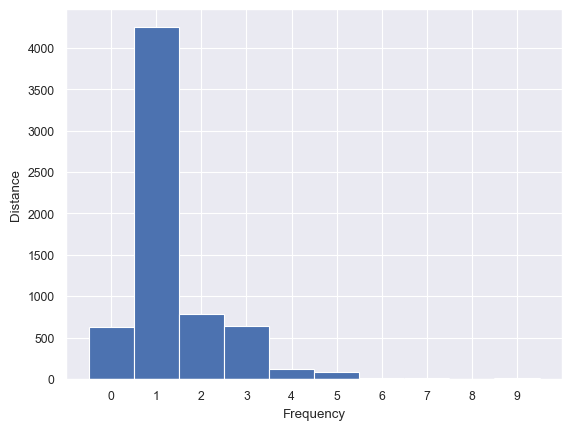

In [17]:
dist_counter

x = dict(dist_counter)

import numpy as np
labels, values = zip(*dist_counter.items())
labels = np.array(labels)
values = np.array(values)
ind = np.argsort(labels)
labels = labels[ind]
values = values[ind]

import matplotlib.pyplot as plt

indexes = np.arange(len(labels[:10]))
width = 1
import seaborn as sns
sns.set_theme('paper')
plt.bar(indexes[:10], values[:10], width)
plt.xticks(indexes)
plt.xlabel("Frequency")
plt.ylabel("Distance")
# plt.show()
plt.savefig('MaSaC_dist_stats.svg', bbox_inches="tight")
plt.savefig('MaSaC_dist_stats.pdf', bbox_inches="tight")

In [18]:
labels = ["neutral", "anger", "surprise", "fear", "joy", "sadness", "disgust", "contempt"]

# Defining the variables
is_flip = [None] * N_uq
flip_from_emotion = [None] * N_uq
flip_from_index = [None] * N_uq
flip_to_emotion = [None] * N_uq
flip_to_index = [None] * N_uq
for i in range(N_uq):
    k = len(utterances_list_uq[i])
    is_flip[i] = [0] * k
    flip_from_emotion[i] = [None] * k
    flip_from_index[i] = [None] * k
    flip_to_emotion[i] = [None] * k
    flip_to_index[i] = [None] * k

# Filling the variables
for i in range(N_uq):
    speakers = set(speakers_list_uq[i])
    state_dict = {}
    for sp in speakers:
        state_dict[sp] = (None, None)   # (ix, emotion)
    
    for j in range(len(utterances_list_uq[i])):
        sp = speakers_list_uq[i][j]
        sp_emotion = emotions_list_uq[i][j]
        if state_dict[sp][0]==None:
            state_dict[sp] = (j, sp_emotion)
        else:
            if state_dict[sp][1]!=sp_emotion:
                is_flip[i][j] = 1
                flip_from_emotion[i][j] = state_dict[sp][1]
                flip_from_index[i][j] = state_dict[sp][0]
                flip_to_emotion[i][j] = sp_emotion
                flip_to_index[i][j] = j
            
            state_dict[sp] = (j, sp_emotion)          
            
# Data Analysis
flip_pair_dict = {}
for label1 in labels:
    for label2 in labels:
        flip_pair_dict[(label1, label2)] = [0, 0]
       
dist_counter= Counter()
for i in range(N_uq):
    for j in range(len(utterances_list_uq[i])):
        if is_flip[i][j]==1:
            flip_pair_dict[(flip_from_emotion[i][j], flip_to_emotion[i][j])][0] += 1
            flip_pair_dict[(flip_from_emotion[i][j], flip_to_emotion[i][j])][1] += flip_to_index[i][j] - flip_from_index[i][j]
            dist_counter.update([flip_to_index[i][j] - flip_from_index[i][j]])

# Formatting
from decimal import Decimal, getcontext
getcontext().prec = 3

# Displaying Results
count_result = {}
for label1 in labels:
    count_result[label1] = [0] * len(labels)

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        count_result[label1][j] = flip_pair_dict[(label1, label2)][0]
        
dist_result = {}

for label1 in labels:
    dist_result[label1] = [0] * len(labels)

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        if flip_pair_dict[(label1, label2)][0]!=0:
            dist_result[label1][j] = Decimal(flip_pair_dict[(label1, label2)][1]) / Decimal(flip_pair_dict[(label1, label2)][0])
        else:
            dist_result[label1][j] = 0

print("Count Statistics")       
print("Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION")
df_count = pd.DataFrame(count_result, pd.Index(labels))
print(df_count)
print("\n\n")
print("Distance between utterances of the flip")
print("Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION")
df_dist = pd.DataFrame(dist_result, pd.Index(labels))
print(df_dist)

Count Statistics
Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION
          neutral  anger  surprise  fear  joy  sadness  disgust  contempt
neutral         0    298       203   208  746      211       54       262
anger         308      0        52    60   69       61       23        71
surprise      240     41         0    29   73       24        7        30
fear          232     45        30     0   85       47       11        23
joy           742     62        73    62    0       76       10        79
sadness       230     59        28    51   65        0        9        19
disgust        49     24        10     8    9       12        0        17
contempt      254     82        39    26   77       28       16         0



Distance between utterances of the flip
Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION
         neutral anger surprise  fear   joy sadness disgust contempt
neutral        0  3.31     3.84  3.12  3.12    

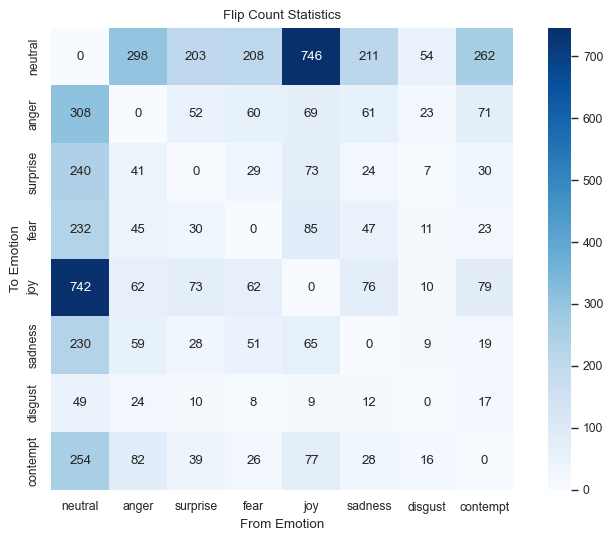

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.heatmap(df_count, annot=True, fmt='.0f', cmap='Blues', square=True)
ax.set_title('Flip Count Statistics')
ax.set_xlabel('From Emotion')
ax.set_ylabel('To Emotion')
plt.savefig('task2_flip_count_stats.svg', bbox_inches="tight")
plt.savefig('task2_flip_count_stats.pdf', bbox_inches="tight")